In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [2]:
movies = pd.read_excel("C:/Users/ArviROG/Desktop/movie.xlsx",sheet_name='Movie_data')
ratings = pd.read_excel("C:/Users/ArviROG/Desktop/movie.xlsx",sheet_name='Rating')

In [3]:
ratings.describe()
print(ratings.shape)


(100004, 4)


In [4]:
print(movies.shape)
movies.describe()


(9125, 3)


,movieId
count,9125.000000
mean,31123.291836
std,40782.633604
min,1.000000
25%,2850.000000
50%,6290.000000
75%,56274.000000
max,164979.000000


In [5]:
movies.head(5)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]

ratings.movieId = ratings.movieId.map(replace_name)

In [8]:
ratings.movieId.head(5)

0                            Dangerous Minds (1995)
1                                      Dumbo (1941)
2                                   Sleepers (1996)
3                       Escape from New York (1981)
4    Cinema Paradiso (Nuovo cinema Paradiso) (1989)
Name: movieId, dtype: object

In [9]:
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')

In [10]:
print(M.shape)
M.head(6)


(671, 9064)


movieId,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
M.describe()

movieId,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
count,2.000000,3.000000,1.0,1.0,2.000000,1.0,4.000000,19.000000,3.0,45.000000,...,2.0,1.0,3.000000,24.000000,1.0,23.000000,1.0,31.000000,1.0,1.0
mean,1.750000,3.833333,2.0,0.5,2.250000,3.5,2.625000,3.052632,5.0,3.755556,...,4.0,1.5,3.333333,3.125000,4.5,2.478261,1.0,3.258065,4.5,3.5
std,1.767767,1.154701,NaN,NaN,2.474874,NaN,1.493039,0.864336,0.0,0.945217,...,0.0,NaN,0.763763,1.181837,NaN,1.201119,NaN,0.929794,NaN,NaN
min,0.500000,2.500000,2.0,0.5,0.500000,3.5,0.500000,1.500000,5.0,0.500000,...,4.0,1.5,2.500000,1.000000,4.5,0.500000,1.0,1.000000,4.5,3.5
25%,1.125000,3.500000,2.0,0.5,1.375000,3.5,2.375000,2.250000,5.0,3.500000,...,4.0,1.5,3.000000,2.000000,4.5,1.500000,1.0,3.000000,4.5,3.5
50%,1.750000,4.500000,2.0,0.5,2.250000,3.5,3.000000,3.000000,5.0,4.000000,...,4.0,1.5,3.500000,3.000000,4.5,2.500000,1.0,3.500000,4.5,3.5
75%,2.375000,4.500000,2.0,0.5,3.125000,3.5,3.250000,3.750000,5.0,4.500000,...,4.0,1.5,3.750000,4.000000,4.5,3.500000,1.0,4.000000,4.5,3.5
max,3.000000,4.500000,2.0,0.5,4.000000,3.5,4.000000,4.500000,5.0,5.000000,...,4.0,1.5,4.000000,5.000000,4.5,4.500000,1.0,5.000000,4.5,3.5


In [12]:
df1 = M.replace(np.nan, 0, regex=True)
df1

movieId,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
X_std = StandardScaler().fit_transform(df1)
X_std

array([[-0.04446977, -0.06506736, -0.03863337, ..., -0.21151937,
        -0.03863337, -0.03863337],
       [-0.04446977, -0.06506736, -0.03863337, ..., -0.21151937,
        -0.03863337, -0.03863337],
       [-0.04446977, -0.06506736, -0.03863337, ..., -0.21151937,
        -0.03863337, -0.03863337],
       ...,
       [-0.04446977, -0.06506736, -0.03863337, ..., -0.21151937,
        -0.03863337, -0.03863337],
       [-0.04446977, -0.06506736, -0.03863337, ..., -0.21151937,
        -0.03863337, -0.03863337],
       [-0.04446977, -0.06506736, -0.03863337, ..., -0.21151937,
        -0.03863337, -0.03863337]])

In [21]:
svd = TruncatedSVD(n_components=240)
svd

TruncatedSVD(algorithm='randomized', n_components=240, n_iter=5,
       random_state=None, tol=0.0)

In [22]:
U = svd.fit_transform(X_std)
U

array([[-4.79130185, -4.91474379, -3.28454076, ...,  0.04320809,
        -0.26250486,  0.08174874],
       [-4.09974695, -4.05484515, -1.54630825, ..., -0.91699019,
        -0.26967461,  0.94622754],
       [-4.37577677, -3.67407195, -2.7779846 , ...,  0.73573648,
        -0.35725902, -0.38402771],
       ...,
       [-4.3120332 , -4.21436762, -2.32341787, ..., -0.20739732,
         0.41484635, -0.09062304],
       [-4.61499125, -4.63934399, -3.05517268, ...,  0.08176316,
         0.17091532, -0.19996158],
       [-2.84602303, -2.70264512, -1.52112816, ..., -0.14859133,
         2.42693335,  0.80999891]])

In [23]:
VT = svd.components_
VT

array([[-2.54498716e-04,  8.60090652e-04,  6.55817267e-05, ...,
         5.46647871e-03,  5.74690523e-04,  1.33794883e-04],
       [-3.57790991e-04,  4.47669911e-04,  4.25032533e-04, ...,
         1.57499654e-02,  3.09209550e-04,  6.25171139e-04],
       [-2.71504018e-04,  5.18572659e-04,  2.67943218e-04, ...,
         1.21714827e-02, -1.23800020e-07, -9.71987065e-04],
       ...,
       [-7.12470668e-04, -3.02842920e-03,  3.14406595e-03, ...,
         1.67020195e-02, -1.18907513e-04,  3.50753525e-04],
       [-8.16817693e-05, -6.48198883e-03, -7.19830425e-03, ...,
         1.04948376e-02, -1.32124134e-03, -1.63239949e-03],
       [ 8.37211280e-03,  3.63717988e-03, -6.29754615e-05, ...,
        -3.49339817e-03,  6.40368245e-04,  3.38365048e-04]])

In [24]:
S = svd.explained_variance_ratio_
S.shape
S

array([0.08239658, 0.05047213, 0.04133105, 0.03202914, 0.02401609,
       0.01954125, 0.01895777, 0.01788642, 0.01733437, 0.01555642,
       0.01447947, 0.01380094, 0.01326238, 0.01265622, 0.01236772,
       0.01187782, 0.01035143, 0.00972559, 0.00918497, 0.00868359,
       0.0081802 , 0.00809438, 0.00792224, 0.0076602 , 0.00738476,
       0.00710275, 0.0070279 , 0.00692735, 0.00661686, 0.00638762,
       0.00632726, 0.00614483, 0.0060689 , 0.00601561, 0.00585503,
       0.0057358 , 0.00546654, 0.00539147, 0.00510335, 0.00498151,
       0.00485297, 0.00476222, 0.00456696, 0.00453713, 0.00448762,
       0.00441326, 0.00436352, 0.00421312, 0.00411209, 0.00404267,
       0.00392071, 0.00388673, 0.00382664, 0.00379658, 0.00375346,
       0.00371109, 0.00364356, 0.00359886, 0.00353434, 0.00346861,
       0.003412  , 0.00332628, 0.00325169, 0.00322705, 0.0031544 ,
       0.00313878, 0.00306481, 0.00301157, 0.00295527, 0.0029288 ,
       0.00291031, 0.00286798, 0.00282511, 0.00278798, 0.00272

0.9080436305687265


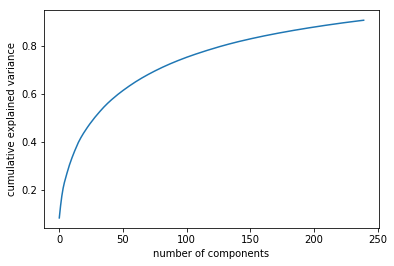

In [25]:
print(svd.explained_variance_ratio_.sum())
plt.plot(np.cumsum(S))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()